In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.pyplot as plt
import numpy as np
from math import *


import pandas as pd
# import seaborn as sns
import glob, os
from mpl_toolkits import mplot3d

# sns.set_context("notebook")
%matplotlib inline


In [3]:

# jtplot.style()
# jtplot.reset()
%matplotlib inline

AllFontSize=18
plt.style.use('seaborn-muted')
colors=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063']
colors_new=cycler(color=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063'])
# This is what makes the CMU Sans Serif Minus Sign work
# matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams['axes.prop_cycle'] = colors_new
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = AllFontSize
plt.rcParams['axes.facecolor'] ='w' 
# plt.rcParams['axes.edgecolor']='k'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.titlesize'] = AllFontSize
# plt.rcParams['grid.color'] = 'BBBBBB'
# plt.rcParams['grid.linestyle'] = ':'
# plt.rcParams['grid.linewidth'] = 0.5
# plt.rcParams['grid.alpha'] = 1
plt.rcParams['legend.fontsize'] = AllFontSize
plt.rcParams['legend.frameon'] = False 
plt.rcParams['xtick.labelsize'] = AllFontSize
plt.rcParams['ytick.labelsize'] = AllFontSize
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=False
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
# plt.rcParams['xtick.minor.size']=2
# plt.rcParams['ytick.minor.size']=2
# plt.rcParams['savefig.bbox']='tight'
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 
# plt.rcParams['text.usetex']=True 
# plt.rcParams['text.latex.unicode'] = True

In [4]:
folder='PressureCavityModelV8_DoubleStacked_Periodic_P-V_Match/'
df=pd.read_csv(folder+'Analysis_45_Output.txt',delimiter=' ',names=['loc','val','coor1','coor2','coor3'])

In [5]:
dfb=df[df['loc']=="BOTTOM-NODES"]
dft=df[df['loc']=="TOP-NODES"]

Text(0.5, 0, 'Y')

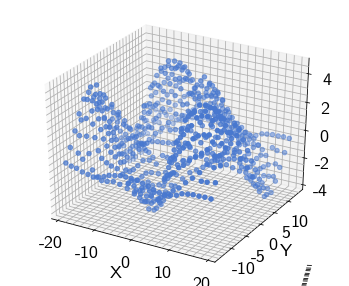

In [6]:
fig = plt.figure()

ax = plt.axes(projection='3d')
# ax.set_aspect('equal')
ax.scatter(dfb.coor1,dfb.coor2,dfb.val, 'binary')
# ax.scatter(dfb.coor1,dfb.coor2, dfb.val, 'binary')

plt.xlabel('X')
plt.ylabel('Y')


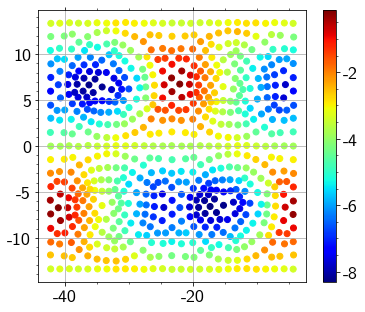

In [7]:
plt.scatter(dft.coor1,dft.coor2,c=dft.val,cmap='jet')
# plt.axis('equal')
plt.colorbar()

# Generate Plot for Out-of-plane deformation

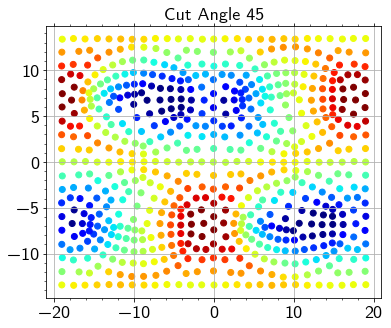

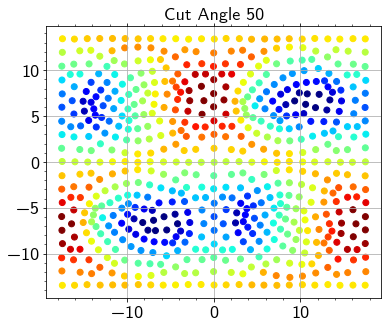

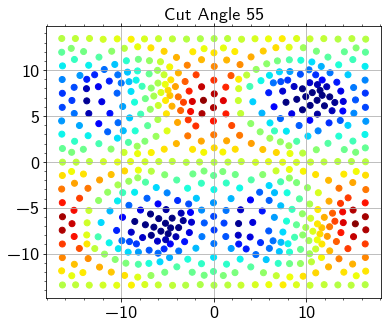

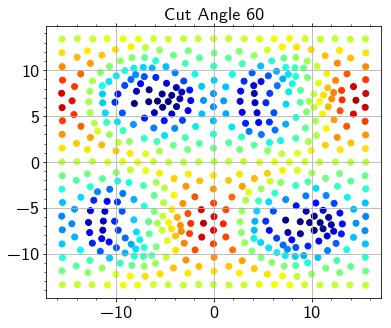

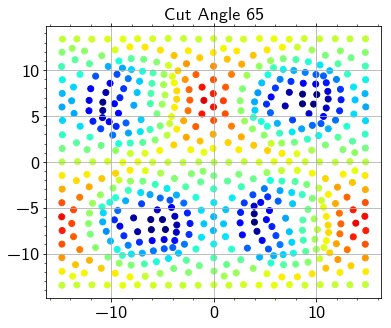

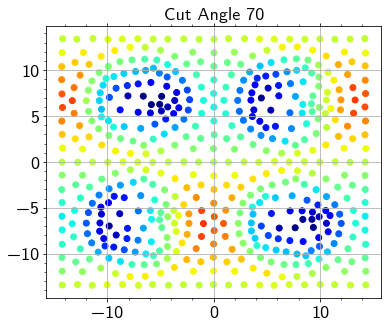

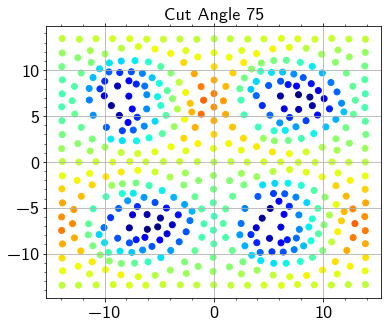

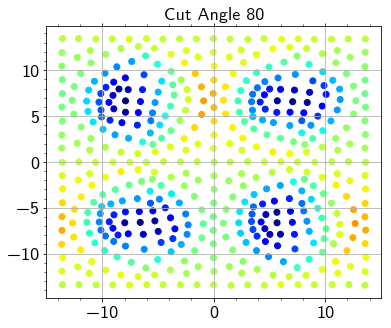

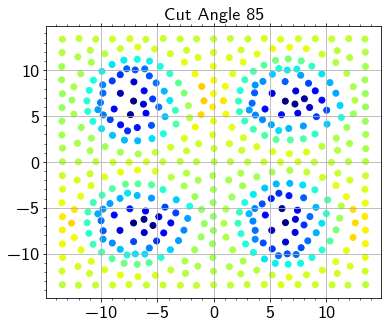

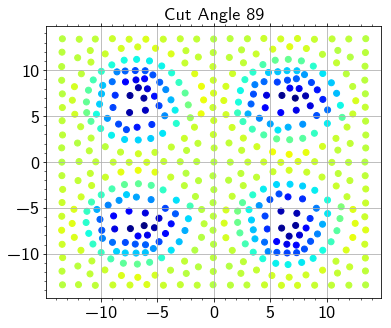

In [6]:
allFiles=glob.glob(folder+"*.txt")
Data=[]
ii=1
for File in allFiles:
    ii+=1
    angle=File.split('\\')[-1].split('_')[1]
    df=pd.read_csv(File,delimiter=' ',names=['loc','val','coor1','coor2','coor3'])
    dfb=df[df['loc']=="BOTTOM-NODES"]
    dft=df[df['loc']=="TOP-NODES"]
    plt.figure()
    plt.scatter(dfb.coor1,dfb.coor2,c=-dfb.val,vmin=-4, vmax=3,cmap='jet')
    plt.title('Cut Angle {}'.format(angle))
    # plt.axis('equal')
    if ii==1:
        plt.colorbar()
    Data.append([float(angle),min(dfb.val)])
Data=np.array(Data)

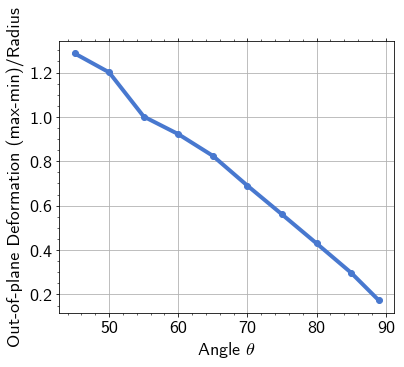

In [8]:
rr=11.66/2.
plt.plot(Data[:,0],-Data[:,1]*2/rr,'-o')
plt.xlabel(r'Angle $\theta$')
plt.ylabel(r'Out-of-plane Deformation (max-min)/Radius')

plt.savefig('figures/NumericalOOP.eps',format='eps')

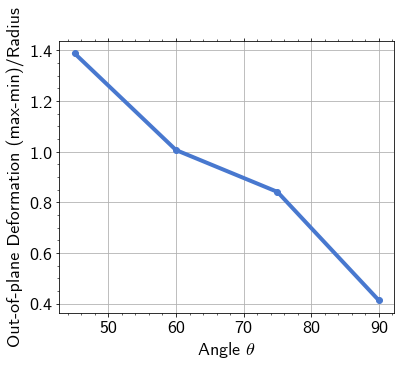

In [7]:
experimentData=np.array([[90,2.408],[75,4.906],[60,5.869],[45,8.095]])
plt.plot(experimentData[:,0],experimentData[:,1]/(rr),'-o',label='Experiments')

plt.xlabel(r'Angle $\theta$')
plt.ylabel(r'Out-of-plane Deformation (max-min)/Radius')

plt.savefig('figures/ExperimentalOOP.eps',format='eps')

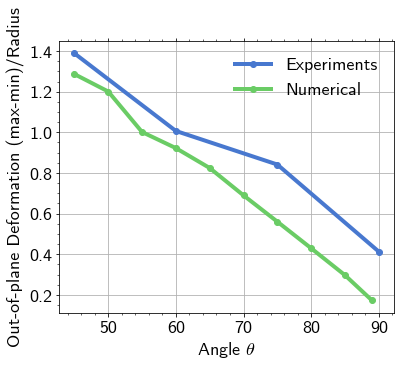

In [17]:
experimentData=np.array([[90,2.408],[75,4.906],[60,5.869],[45,8.095]])
plt.plot(experimentData[:,0],experimentData[:,1]/(rr),'-o',label='Experiments')
plt.plot(Data[:,0],-Data[:,1]*2/rr,'-o',label='Numerical')

plt.xlabel(r'Angle $\theta$')
plt.ylabel(r'Out-of-plane Deformation (max-min)/Radius')

plt.legend()

# PV Measurements

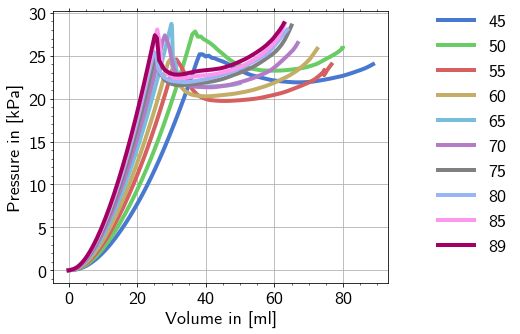

In [17]:
allFilesPV=glob.glob(folder+"*.pv")
plt.figure()
for pv in allFilesPV:
#     print(pv)
    angle=pv.split('\\')[-1].split('.')[0].split('_')[1]
    VActuator = (2*11.66/sin(radians(float(angle))))*(pi*(11.66/2)**2)*36/1000
    df=pd.read_csv(pv,delimiter=',',names=['v','p'])
    plt.plot((-df.v/max(df.v)+1)*VActuator,-df.p*1000,label=angle)
    plt.xlabel('Volume in [ml]')
    plt.ylabel('Pressure in [kPa]')
plt.legend(bbox_to_anchor=(1.1, 1.05))


PressureCavityModelV10_DoubleStacked_P-VMatchNoChannels\Analysis_45.pv
PressureCavityModelV10_DoubleStacked_P-VMatchNoChannels\Analysis_60.pv
PressureCavityModelV10_DoubleStacked_P-VMatchNoChannels\Analysis_75.pv
PressureCavityModelV10_DoubleStacked_P-VMatchNoChannels\Analysis_89.pv


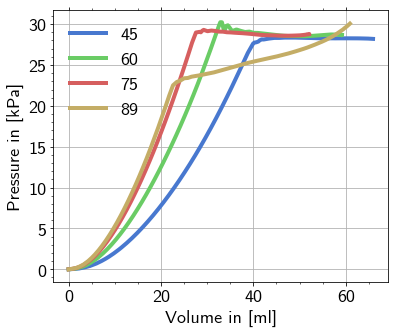

In [20]:
allFilesPV=glob.glob('PressureCavityModelV10_DoubleStacked_P-VMatchNoChannels/'+"*.pv")
plt.figure()
for pv in allFilesPV:
    print(pv)
    angle=pv.split('\\')[-1].split('.')[0].split('_')[1]
    VActuator = (2*11.66/sin(radians(float(angle))))*(pi*(11.66/2)**2)*36/1000

    df=pd.read_csv(pv,delimiter=',',names=['v','p'])
    plt.plot((-df.v/max(df.v)+1)*VActuator,-df.p*1000,label=angle)
    plt.xlabel('Volume in [ml]')
    plt.ylabel('Pressure in [kPa]')
plt.legend()
